## Dataset for model

In [1]:
import warnings
warnings.filterwarnings('ignore')

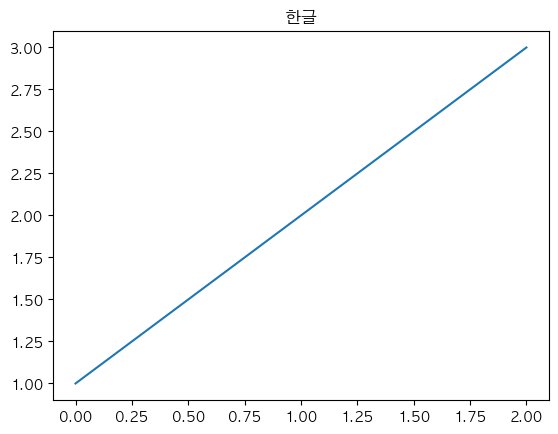

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="AppleGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

### 0. 데이터 로드

In [3]:
import pandas as pd

df = pd.read_csv('../data/울산_전처리_ver5.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143530 entries, 0 to 143529
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   항명                    143530 non-null  object 
 1   호출부호                  143530 non-null  object 
 2   선박명                   143530 non-null  object 
 3   입항횟수_연도               143530 non-null  float64
 4   입항횟수_횟수               143530 non-null  float64
 5   구분                    143530 non-null  object 
 6   입출                    143530 non-null  object 
 7   총톤수_x                 143530 non-null  object 
 8   입항일시                  143530 non-null  object 
 9   출항일시                  143530 non-null  object 
 10  수리일시                  143495 non-null  object 
 11  항해구분                  143530 non-null  object 
 12  계선장소_코드               143530 non-null  object 
 13  계선장소_숫자               143530 non-null  int64  
 14  계선장소명                 143530 non-null  object 
 15  

#### 이상치
- 입항일시와 출항일시가 20,21,22 밖에 있는 행은 사전에 제거함

#### 1. EDA

In [5]:
df.drop(columns = '일시', inplace = True)

#### 1.1 선박 용도별 접안_대기시간_계산
- 운반선, 컨테이너선 / 비컨테이너,운반선간 대기율 차이가 존재할 것
- 각각 접안_대기시간 계산 후 비교
- 0인 용도 제외 시계열 데이터 예측

In [6]:
df['선박용도'].value_counts()

석유제품 운반선       83427
케미칼 운반선        21327
LPG 운반선         6357
일반화물선           4730
풀컨테이너선          4161
견인용예선           3967
기타 유조선          3764
급유선             2974
자동차운반선          2945
원유운반선           2726
산물선(벌크선)        2306
기타 예선           1951
케미칼가스 운반선        619
기타선              570
시멘트운반선           546
압항 예선            210
모래운반선            202
신조선              156
이.접안용 예선         126
철강재 운반선          119
폐기물 운반선           96
관공선               65
LNG 운반선           57
코일전용선             41
세미(혼재)컨테이너선       35
용달선               29
여객선               11
군함                 6
냉동.냉장선             1
원양 어선              1
원목운반선              1
유람선                1
화객선                1
기타 부선              1
수상레저기구             1
Name: 선박용도, dtype: int64

In [7]:
ship_mapping = df.groupby('선박용도')['접안_대기시간_분'].mean()

In [8]:
ship_mapping = ship_mapping.to_frame().reset_index()

In [9]:
df_sorted = ship_mapping.sort_values(by='접안_대기시간_분', ascending=False)

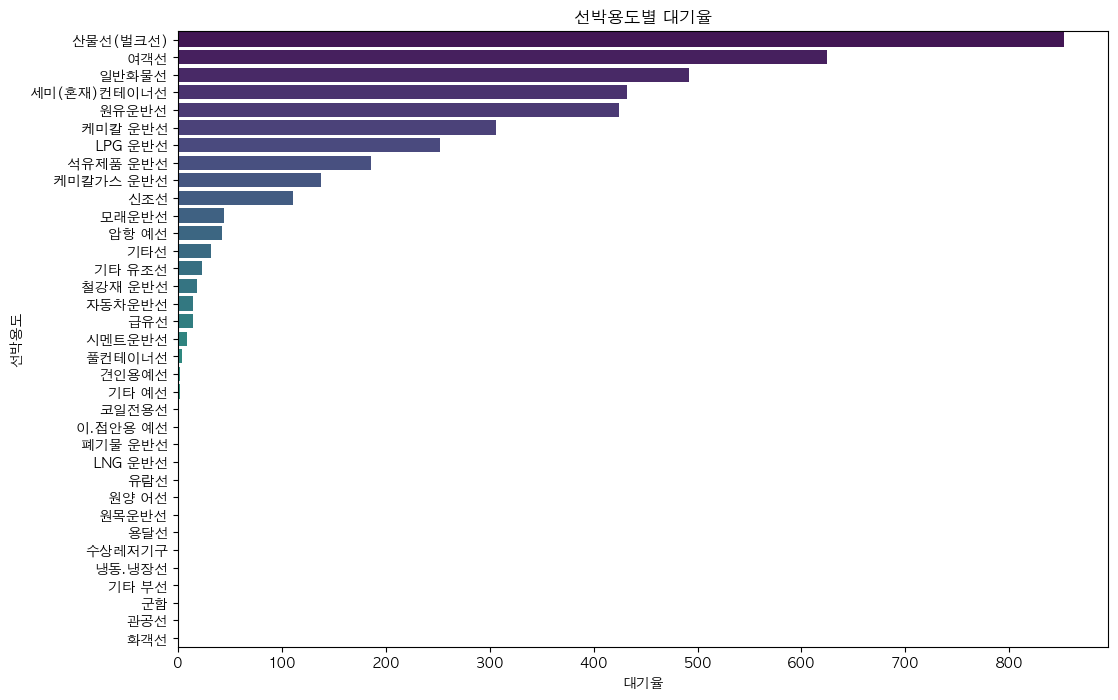

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='접안_대기시간_분', y='선박용도', data=df_sorted, palette='viridis', ax=ax)
ax.set_title('선박용도별 대기율')
ax.set_xlabel('대기율')
ax.set_ylabel('선박용도')

# Show the plot
plt.show()

In [11]:
ship_rank = ship_mapping[ship_mapping['접안_대기시간_분'] > 0.0].sort_values(by = '접안_대기시간_분', ascending = False)

In [12]:
ship_rank.reset_index()

,index,선박용도,접안_대기시간_분
0,12,산물선(벌크선),852.421943
1,19,여객선,624.545455
2,26,일반화물선,491.400423
3,14,세미(혼재)컨테이너선,431.657143
4,23,원유운반선,424.152605
5,29,케미칼 운반선,305.637174
6,1,LPG 운반선,252.388391
7,13,석유제품 운반선,185.594544
8,30,케미칼가스 운반선,137.323102
9,17,신조선,110.621795


#### 1.2 선석별 대기시간 차이
- 선석 기준 대기시간 예측 > row개수 115개

In [13]:
service_place = df.groupby('계선장소명')['접안_대기시간_분'].mean()

In [14]:
service_place = service_place.to_frame().reset_index()

In [15]:
service_place.sort_values(by = '접안_대기시간_분', ascending = False, inplace = True)
service_place

,계선장소명,접안_대기시간_분
82,온산3부두,1270.935000
38,SK7부두,1224.466224
62,석탄부두 01,1136.400000
39,SK8부두,869.973009
37,SK6부두,659.932401
...,...,...
91,이진소형선부두,0.000000
12,6부두 01,0.000000
48,대한유화소형선부두,0.000000
46,남화부두,0.000000


In [16]:
service_place.reset_index()

,index,계선장소명,접안_대기시간_분
0,82,온산3부두,1270.935000
1,38,SK7부두,1224.466224
2,62,석탄부두 01,1136.400000
3,39,SK8부두,869.973009
4,37,SK6부두,659.932401
...,...,...,...
130,91,이진소형선부두,0.000000
131,12,6부두 01,0.000000
132,48,대한유화소형선부두,0.000000
133,46,남화부두,0.000000


In [17]:
service_delay = service_place[service_place['접안_대기시간_분'] > 0.00]

In [18]:
service_delay

,계선장소명,접안_대기시간_분
82,온산3부두,1270.935000
38,SK7부두,1224.466224
62,석탄부두 01,1136.400000
39,SK8부두,869.973009
37,SK6부두,659.932401
...,...,...
122,한진부두,1.346154
47,달포부두 01,1.241816
83,온산4부두,0.970986
41,SK부이 03,0.740741


In [19]:
## 선석 기준 대기시간 예측 > row개수 115개

#### 1.4 접안_대기시간_분 Corr()
- 의미 없음

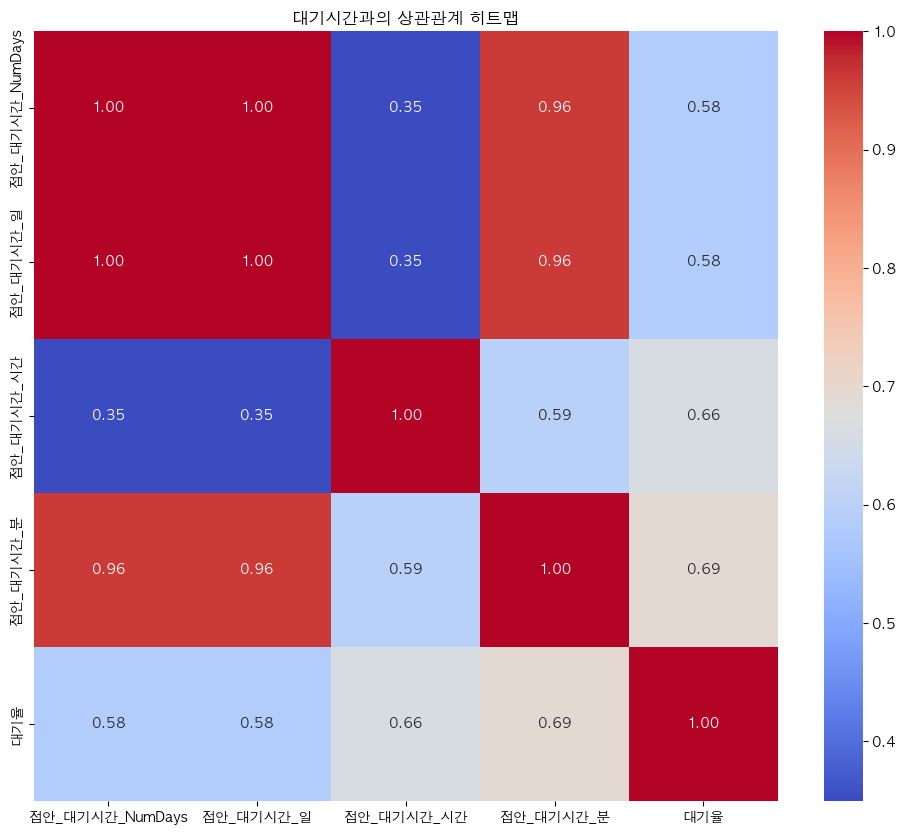

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 대기시간과의 상관관계 계산
correlation_matrix = df.corr()

# 대기시간과 상관관계가 0.2이상인 변수들 선택
high_corr_columns = correlation_matrix['접안_대기시간_분'][abs(correlation_matrix['접안_대기시간_분']) >= 0.2].index

# 선택된 변수들로 새로운 데이터프레임 생성
selected_df = df[high_corr_columns]

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('대기시간과의 상관관계 히트맵')
plt.show()

### 2. 시계열 예측 모델 데이터셋 구성

- 단순 컬럼 세팅

In [21]:
df.columns

Index(['항명', '호출부호', '선박명', '입항횟수_연도', '입항횟수_횟수', '구분', '입출', '총톤수_x', '입항일시',
       '출항일시', '수리일시', '항해구분', '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도', '순번',
       '시설사용횟수', '신고톤수', '지정시설_코드', '지정시설_번호', '지정시설명', '지정일시(FROM)',
       '지정일시(TO)', '사용목적명', '예보일시', '허가유무', '접안_대기시간', 'Service_Time_End',
       'Anchor', 'Service_Time_Start', 'Service_Time', '접안_대기시간_NumDays',
       'Service_Time_NumDays', '접안_대기시간_일', '접안_대기시간_시간', '접안_대기시간_분',
       'Service_Time_일', 'Service_Time_시간', 'Service_Time_분', '대기율', '재화중량톤수',
       '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)',
       '선박국적(code)', '선박국적(이름)', 'ETA_Year', 'ETA_Month', 'ETA_Day',
       'ETA_Hour', 'ETA_Minute', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)'],
      dtype='object')

In [22]:
cols = ['입항일시','접안_대기시간_분','풍속(m/s)','기온(°C)','선박제원(총길이, m)', '선박제원(너비, m)']
temp = df[cols]

In [23]:
temp

,입항일시,접안_대기시간_분,풍속(m/s),기온(°C),"선박제원(총길이, m)","선박제원(너비, m)"
0,2020-01-01 00:10:00,0,7.6,3.8,59.40,10.0
1,2020-01-01 01:05:00,0,9.3,4.3,70.90,12.0
2,2020-01-01 03:05:00,0,12.6,4.3,96.00,15.0
3,2020-01-01 03:40:00,0,12.6,4.3,135.00,24.8
4,2020-01-01 04:30:00,0,11.4,3.4,83.30,14.0
...,...,...,...,...,...,...
143525,2022-12-31 09:45:00,0,11.4,5.7,54.10,10.0
143526,2022-12-31 10:05:00,0,12.2,5.6,88.60,14.6
143527,2022-12-31 15:55:00,0,7.3,7.8,79.99,14.0
143528,2022-12-31 17:55:00,0,4.8,8.0,36.80,7.4


In [24]:
temp.isna().sum()

입항일시                0
접안_대기시간_분           0
풍속(m/s)         11936
기온(°C)           5578
선박제원(총길이, m)      940
선박제원(너비, m)       940
dtype: int64

In [25]:
temp.dropna(inplace = True)

- 데이터셋2

In [26]:
# 문자열 컬럼 제거
string_columns = df.select_dtypes(include=['object']).columns
temp2 = df.drop(columns=string_columns)

In [27]:
temp2.columns

Index(['입항횟수_연도', '입항횟수_횟수', '계선장소_숫자', '순번', '시설사용횟수', '지정시설_번호',
       '접안_대기시간_NumDays', 'Service_Time_NumDays', '접안_대기시간_일', '접안_대기시간_시간',
       '접안_대기시간_분', 'Service_Time_일', 'Service_Time_시간', 'Service_Time_분',
       '대기율', '선박제원(총길이, m)', '만재흘수(m)', '깊이(m)', '길이1(m)', 'ETA_Year',
       'ETA_Month', 'ETA_Day', 'ETA_Hour', 'ETA_Minute', '풍속(m/s)', '풍향(deg)',
       'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)',
       '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)'],
      dtype='object')

In [28]:
drop_cols = ['접안_대기시간_NumDays', 'Service_Time_NumDays','접안_대기시간_일', '접안_대기시간_시간','Service_Time_일', 'Service_Time_시간', 'Service_Time_분',
             '대기율']
temp2 = temp2.drop(columns = drop_cols)

### 시계열 예측 모델

#### Holt-Winters Exponential Smoothing 

In [29]:
df = temp.copy()

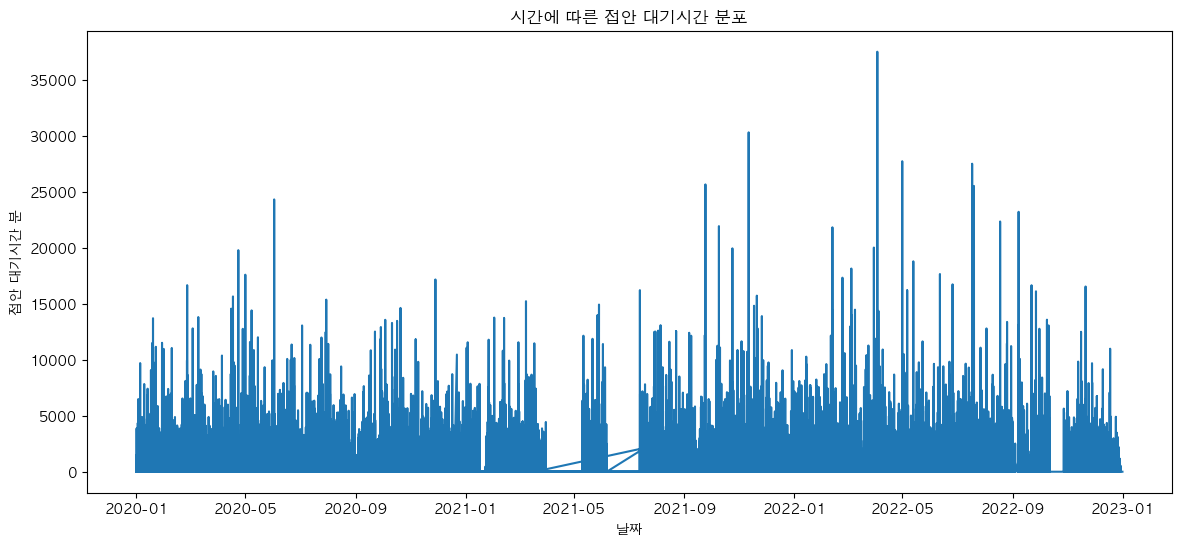

/Users/kimsinwoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kimsinwoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kimsinwoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/kimsinwoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


평균 제곱 오차(MSE): 2935633.0469409353
제곱근 평균 제곱 오차(RMSE): 1713.3689173499488


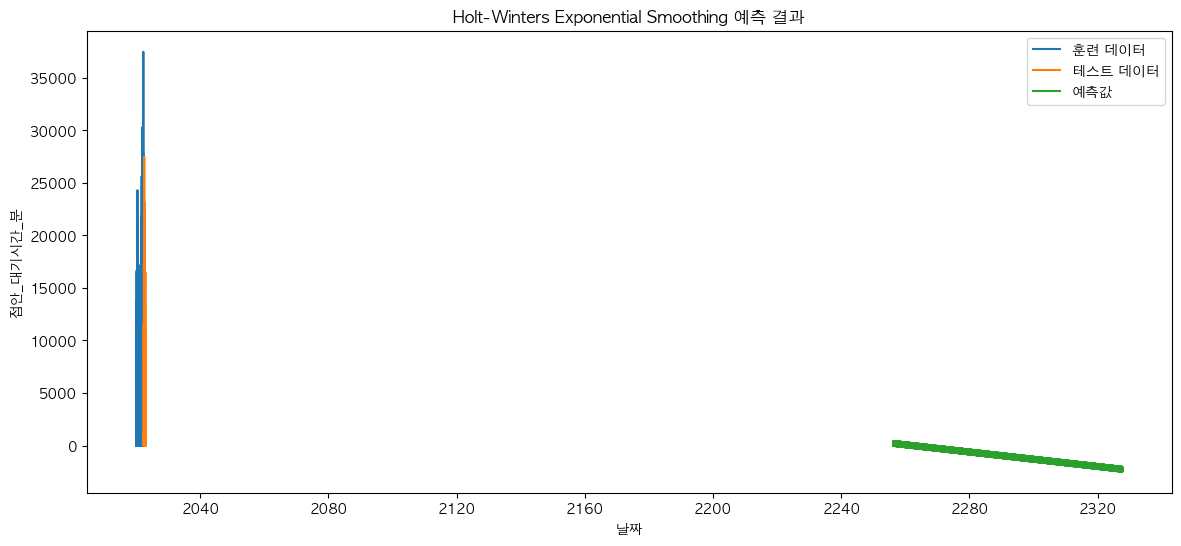

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

df['입항일시'] = pd.to_datetime(df['입항일시'])

df.set_index('입항일시', inplace=True)

plt.figure(figsize=(14, 6))
plt.plot(df['접안_대기시간_분'])
plt.title('시간에 따른 접안 대기시간 분포')
plt.xlabel('날짜')
plt.ylabel('접안 대기시간 분')
plt.show()

# 훈련8 테스트2
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Holt-Winters Exponential Smoothing 
model = ExponentialSmoothing(train['접안_대기시간_분'], trend='add', seasonal='add', seasonal_periods=24)
model_fit = model.fit(optimized=True)

# 예측
predictions = model_fit.forecast(steps=len(test))

# 모델 평가
mse = mean_squared_error(test['접안_대기시간_분'], predictions)
rmse = np.sqrt(mse)
print(f'평균 제곱 오차(MSE): {mse}')
print(f'제곱근 평균 제곱 오차(RMSE): {rmse}')

# 비교
plt.figure(figsize=(14, 6))
plt.plot(train['접안_대기시간_분'], label='훈련 데이터')
plt.plot(test['접안_대기시간_분'], label='테스트 데이터')
plt.plot(predictions, label='예측값')
plt.title('Holt-Winters Exponential Smoothing 예측 결과')
plt.xlabel('날짜')
plt.ylabel('접안_대기시간_분')
plt.legend()
plt.show()


In [33]:
df = temp.copy()

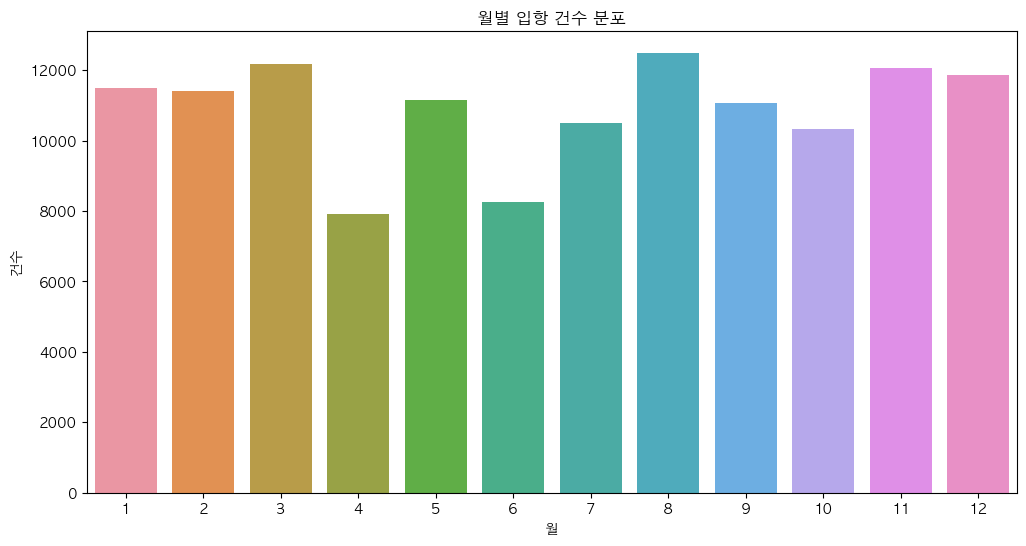

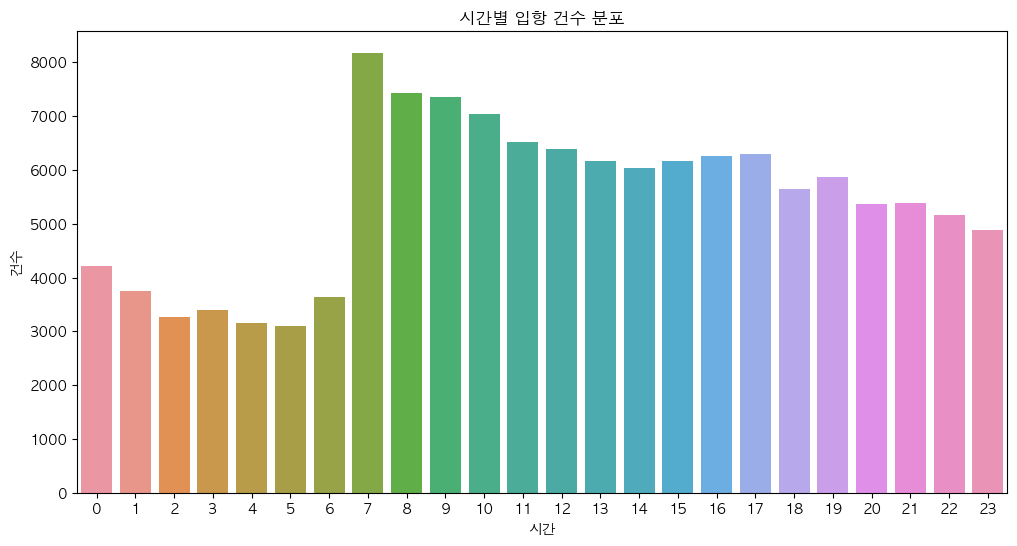

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['입항일시'] = pd.to_datetime(df['입항일시'])

# '월'과 '시간' 정보를 추출합니다.
df['월'] = df['입항일시'].dt.month
df['시간'] = df['입항일시'].dt.hour

# 월별 분포를 시각화합니다.
plt.figure(figsize=(12, 6))
sns.countplot(x='월', data=df)
plt.title('월별 입항 건수 분포')
plt.xlabel('월')
plt.ylabel('건수')
plt.show()

# 시간별 분포를 시각화합니다.
plt.figure(figsize=(12, 6))
sns.countplot(x='시간', data=df)
plt.title('시간별 입항 건수 분포')
plt.xlabel('시간')
plt.ylabel('건수')
plt.show()


#### 주기성 확인

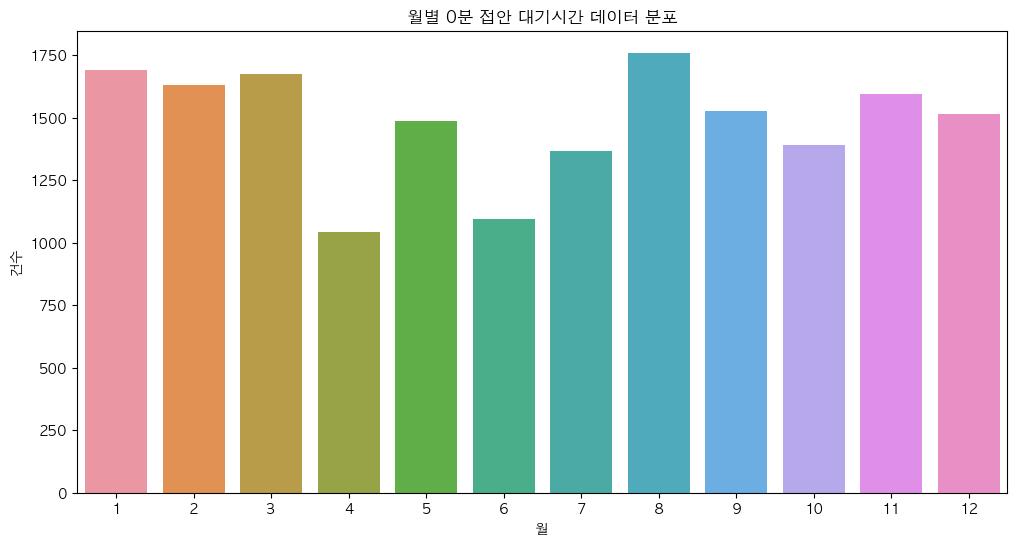

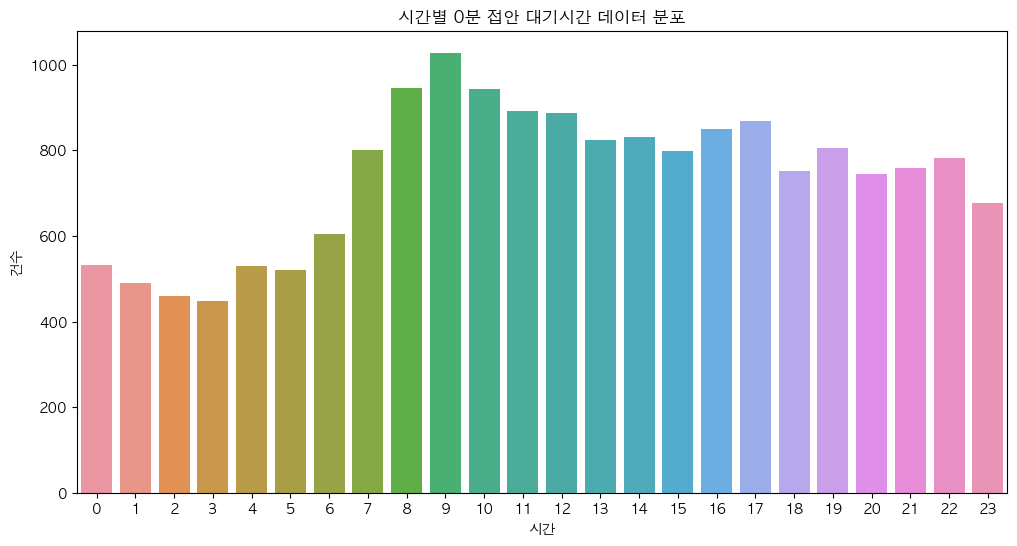

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 타입
df['입항일시'] = pd.to_datetime(df['입항일시'])
df['월'] = df['입항일시'].dt.month
df['시간'] = df['입항일시'].dt.hour

# 접안 대기시간이 발생하는 것만 시각화
zero_wait_time_df = df[df['접안_대기시간_분'] > 0]

# '접안_대기시간_분'이 0인 데이터의 월별 분포를 시각화합니다.
plt.figure(figsize=(12, 6))
sns.countplot(x='월', data=zero_wait_time_df)
plt.title('월별 0분 접안 대기시간 데이터 분포')
plt.xlabel('월')
plt.ylabel('건수')
plt.show()

# '접안_대기시간_분'이 0인 데이터의 시간별 분포를 시각화합니다.
plt.figure(figsize=(12, 6))
sns.countplot(x='시간', data=zero_wait_time_df)
plt.title('시간별 0분 접안 대기시간 데이터 분포')
plt.xlabel('시간')
plt.ylabel('건수')
plt.show()


In [153]:
pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [155]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/22/50/1e211cbb5e1f52e55eeae1605789c9d24403962d37581cf0deb3e6b33377/tensorflow-2.14.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.4 MB/s eta 0:00:00
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/c9/ea/fe2a69cc6cfebf7c7ee8a6357566fc1cbb91632bde5869b669a396accb5f/libclang-16.0.6-py2.py3-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for

#### LSTM

In [39]:
temp.isna().sum()

입항일시            0
접안_대기시간_분       0
풍속(m/s)         0
기온(°C)          0
선박제원(총길이, m)    0
선박제원(너비, m)     0
dtype: int64

In [40]:
df = temp.copy()

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


df['입항일시'] = pd.to_datetime(df['입항일시'])

# '접안_대기시간_분'이 0인 데이터만 선택
zero_wait_time_df = df[df['접안_대기시간_분'] == 0]

# 시계열 데이터_ '입항일시'를 인덱스로 설정
zero_wait_time_df.set_index('입항일시', inplace=True)

# LSTM 모델에 사용할 feature '접안_대기시간_분' 추출
data = zero_wait_time_df['접안_대기시간_분'].values.reshape(-1, 1)

# Min-Max 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 학습 데이터와 테스트 데이터 분리
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# X, y 데이터 생성
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 12  # 12개 이전 데이터 사용
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# LSTM 데이터 변환
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# 모델 예측
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 역 스케일링
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# 학습, 테스트데이터 준비
train_actual = scaler.inverse_transform([y_train])
test_actual = scaler.inverse_transform([y_test])

# 평가지표
mse_train = mean_squared_error(train_actual[0], train_predict[:, 0])
mse_test = mean_squared_error(test_actual[0], test_predict[:, 0])

print(f'Training Mean Squared Error: {mse_train}')
print(f'Test Mean Squared Error: {mse_test}')

# 시각화 데이터셋 구성
train_size = len(train_actual[0])
test_size = len(test_actual[0])
train_predict_plot = np.empty_like(data_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:train_size, :] = train_predict

test_predict_plot = np.empty_like(data_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[train_size + look_back:len(data_scaled), :] = test_predict

# 원본, 예측값 시각화
plt.figure(figsize=(14, 6))
plt.plot(scaler.inverse_transform(data_scaled), label='Actual Data')
plt.plot(train_predict_plot, label='Training Predictions')
plt.plot(test_predict_plot, label='Test Predictions')
plt.title('LSTM 모델을 사용한 접안 대기시간 예측')
plt.xlabel('시간')
plt.ylabel('접안 대기시간 분')
plt.legend()
plt.show()


Epoch 1/50
2822/2822 - 13s - loss: 0.0000e+00 - 13s/epoch - 4ms/step
Epoch 2/50
2822/2822 - 11s - loss: 0.0000e+00 - 11s/epoch - 4ms/step
Epoch 3/50
2822/2822 - 11s - loss: 0.0000e+00 - 11s/epoch - 4ms/step
Epoch 4/50
2822/2822 - 11s - loss: 0.0000e+00 - 11s/epoch - 4ms/step
Epoch 5/50
2822/2822 - 12s - loss: 0.0000e+00 - 12s/epoch - 4ms/step
Epoch 6/50
2822/2822 - 13s - loss: 0.0000e+00 - 13s/epoch - 5ms/step
Epoch 7/50
2822/2822 - 14s - loss: 0.0000e+00 - 14s/epoch - 5ms/step
Epoch 8/50
2822/2822 - 13s - loss: 0.0000e+00 - 13s/epoch - 5ms/step
Epoch 9/50
2822/2822 - 12s - loss: 0.0000e+00 - 12s/epoch - 4ms/step
Epoch 10/50
2822/2822 - 12s - loss: 0.0000e+00 - 12s/epoch - 4ms/step
Epoch 11/50
2822/2822 - 12s - loss: 0.0000e+00 - 12s/epoch - 4ms/step
Epoch 12/50
2822/2822 - 11s - loss: 0.0000e+00 - 11s/epoch - 4ms/step
Epoch 13/50
2822/2822 - 11s - loss: 0.0000e+00 - 11s/epoch - 4ms/step
Epoch 14/50
2822/2822 - 12s - loss: 0.0000e+00 - 12s/epoch - 4ms/step
Epoch 15/50
2822/2822 - 13s -

ValueError: could not broadcast input array from shape (90303,1) into shape (90291,1)